# ANOVA_settings.ipynb

#!/usr/bin/env python

    File name: ANOVA_settings.ipynb
    Author: Andreas Prein
    E-mail: prein@ucar.edu
    Date created: 19.04.2018
    Date last modified: 19.04.2018

    ############################################################## 
    Purpos:
    Perform a variance decomposition on the setup testing that is performed in:
    /glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/programs/XWTing/SearchOptimum_XWT.py

    1) read in the preprocessed files

    2) perform the variance decomposition

    3) save a plot showing the variance contribution 


In [1]:
from dateutil import rrule
import datetime
import glob
from netCDF4 import Dataset
import sys, traceback
import dateutil.parser as dparser
import string
from pdb import set_trace as stop
import numpy as np
import numpy.ma as ma
import os
from mpl_toolkits import basemap
import pickle
import subprocess
import pandas as pd
from scipy import stats
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pylab as plt
import random
import scipy.ndimage as ndimage
import scipy
import shapefile
import matplotlib.path as mplPath
from matplotlib.patches import Polygon as Polygon2
# Cluster specific modules
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.vq import kmeans2,vq, whiten
from scipy.ndimage import gaussian_filter
# import seaborn as sns
# import metpy.calc as mpcalc
import shapefile as shp
import sys 
import matplotlib.gridspec as gridspec

### Setup

In [2]:
sPlotDir='/glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/plots/ANOVA/'
sDataDir='/glade/campaign/mmm/c3we/prein/Papers/2019_Janice-CA-Fire-WTs/data/AUC-APR/'
DW_Regions=['Bay_Area','Central_Coast','LA','Modoc','Northeast','San_Diego','Siearas_East','Siearas_West']
sRegNames=DW_Regions
sMonths='1-2-3-4-5-6-7-8-9-10-11-12'
YYYY_stamp='2001-2019'

### Load the data and perform the variance decomposition

In [3]:
ANOVA_All=np.zeros((10,2,len(DW_Regions))); ANOVA_All[:]=np.nan
for re in range(len(DW_Regions)):
    sRegion=DW_Regions[re]
    sRegion=sRegion.replace('/','-')
    SaveStats=sDataDir+sRegion+'_'+YYYY_stamp+'-'+sMonths+'_MODIS_ERA5.npz'
    try:
        DATA=np.load(SaveStats)
    except:
        print('    Missing: '+SaveStats)
        continue
    SkillScores_All=DATA['SkillScores_All']
#     VariableIndices=DATA['VariableIndices']
    VarsFullName=DATA['rgsWTvars']
    rgrNrOfExtremes=DATA['rgrNrOfExtremes']
    WT_Domains=DATA['WT_Domains']
    Annual_Cycle=DATA['Annual_Cycle']
    SpatialSmoothing=DATA['SpatialSmoothing']
    Metrics=DATA['Metrics']
    Dimensions=DATA['Dimensions']

    # Variance decomposition
    iStat = [3,5]
    for ss in range(2):
        DATA=np.squeeze(SkillScores_All[:,:,:,:,:,ss,iStat[ss]])
#         DATA=np.squeeze(np.nanmean(SkillScores_All[:,:,:,:,:,ss,(3,5)], axis=5))
        DimensionNames=['V','E','D','S']
        from Functions_Extreme_WTs import VarDecomp_4D
        ANOVA_All[:,ss,re], ComponentNames = VarDecomp_4D(DATA,DimensionNames)
        
ANOVA_SSmean=ANOVA_All

### Plotting

        Plot map to: /glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/plots/ANOVA/ANOVA_setting-decomposition.pdf


findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


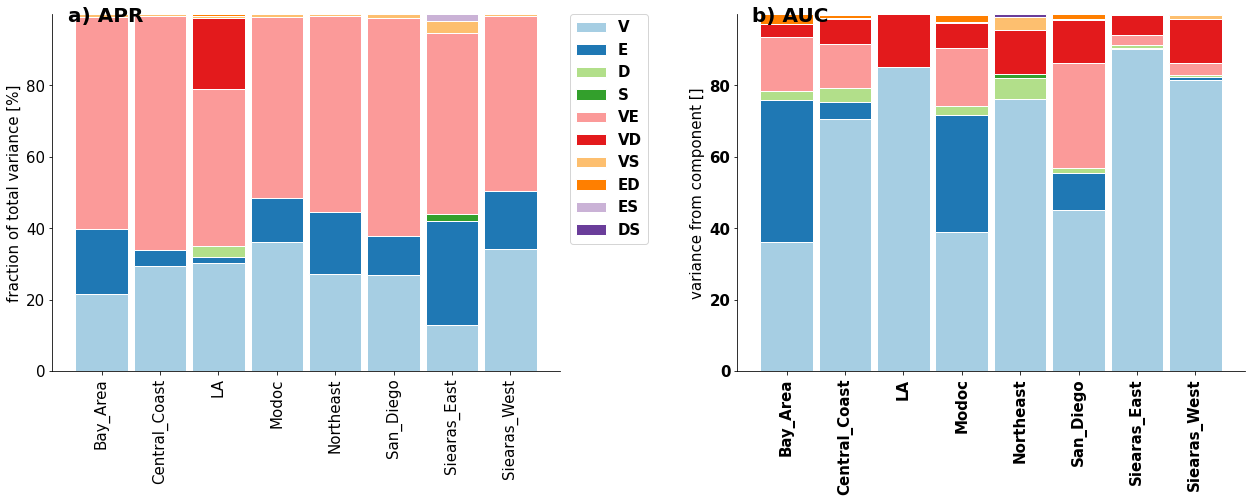

In [4]:
plt.rcParams.update({'font.size': 15})
rgsLableABC=list(string.ascii_lowercase)

fig = plt.figure(figsize=(18,8))
gs1 = gridspec.GridSpec(1,2)
gs1.update(left=0.07, right=0.99,
           bottom=0.33, top=0.95,
           wspace=0.35, hspace=0.20)
Stats = ['APR','AUC']
# loop over the two statistics
for pl in range(2):
    ax = plt.subplot(gs1[0,pl])

    from matplotlib import rc
    rc('font', weight='bold')
    if pl == 0:
        VarianceComponents=(ANOVA_SSmean[:,pl]/np.nansum(ANOVA_SSmean[:,pl],axis=0))*100.
        yAxLabel="fraction of total variance [%]"
    if pl == 1:
        VarianceComponents=(ANOVA_SSmean[:,pl]/np.nansum(ANOVA_SSmean[:,pl],axis=0))*100.
        yAxLabel="variance from component []"
        
    bars1 = VarianceComponents
    color=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
    for ba in range(len(bars1)):
        plt.bar(range(bars1.shape[1]), bars1[ba], bottom=np.nansum(bars1[:ba,:],axis=0), 
                color=color[:len(bars1)][ba], edgecolor='white', width=0.9, label=ComponentNames[ba])
    plt.ylabel(yAxLabel)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if pl == 0:
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    ax.set_xticks(range(len(sRegNames)))
    ax.set_xticklabels(sRegNames,rotation=90)
    ax.text(0.03,1.02, rgsLableABC[pl]+') '+Stats[pl] , ha='left',va='top', \
                transform = ax.transAxes, fontname="Times New Roman Bold", fontsize=20, weight='bold')

sPlotFile=sPlotDir
sPlotName= 'ANOVA_setting-decomposition.pdf'
if os.path.isdir(sPlotFile) != 1:
    subprocess.call(["mkdir","-p",sPlotFile])
print( '        Plot map to: '+sPlotFile+sPlotName)
fig.savefig(sPlotFile+sPlotName)

In [13]:
range(bars1.shape[1])

range(0, 2)

In [14]:
bars1.shape

(10, 2, 8)